In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')


# 2

BMI = df['weight'] / (df['height']/100)**2   # BMI = Weight(kg) / (Height(m))^2

df['overweight'] = (BMI > 25).astype(int)    #.astype(int) converts True/False to 1/0


# 3
# gluc and cholesterol: if 1: set to 0 (good).  if >1, set to 1 (bad)

df['gluc'] = (df['gluc'] > 1).astype(int)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)


# 4
def draw_cat_plot():
    # 5
    # Converts selected columns from wide to long format (unpivots)
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # 6
    # Split df_cat into two groups: those with cardio = 1, and cardio = 0
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    

    # 7
    # Plotting the category plot
    cardio_plot = sns.catplot(data=df_cat,
                x='variable', y='total',   
                hue='value', col='cardio',    # col = cardio splits fig into two: a) cardio = 0, b) cardio = 1
                kind='bar', height=5, aspect=1)
    plt.tight_layout()


    # 8
    # Saves as a figure
    fig = cardio_plot.fig


    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025))
                & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025))
                & (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr()

    # 13
    # Creating mask for upper triangle (because in Corr matrix, upper and lower diagonals are mirrored)
    # mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    mask = np.triu(corr)


    # 14
    fig, ax = plt.subplots()

    # 15
    # Looked up sns.heatmap() on seaborn website
    # Filled in relevant parameters
    sns.heatmap(data = corr, mask = mask, square = True)


    # 16
    fig.savefig('heatmap.png')
    return fig


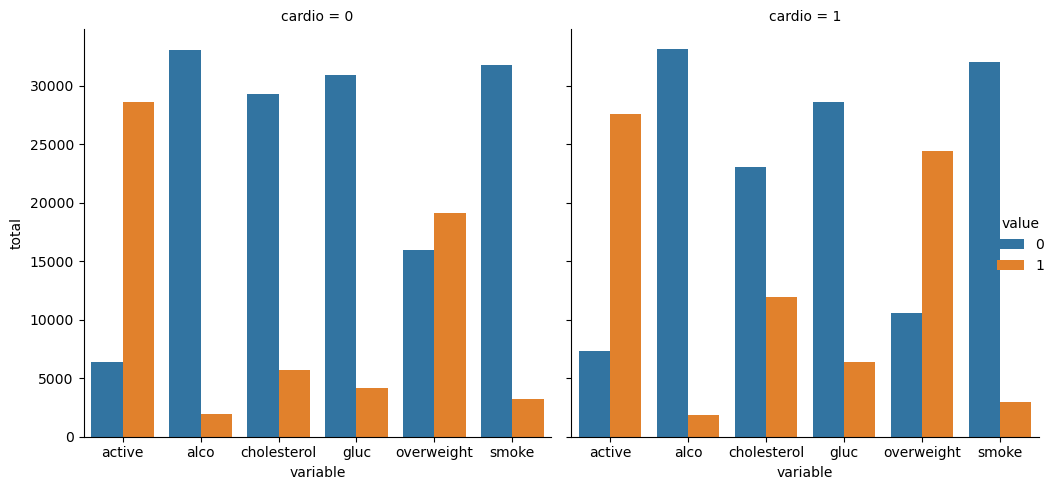

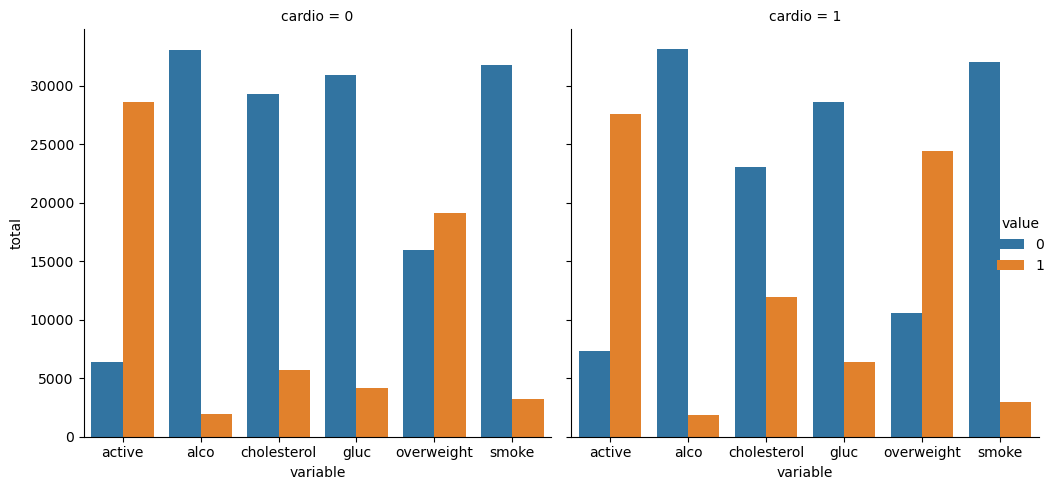

In [90]:
draw_cat_plot()

NameError: name 'fig' is not defined

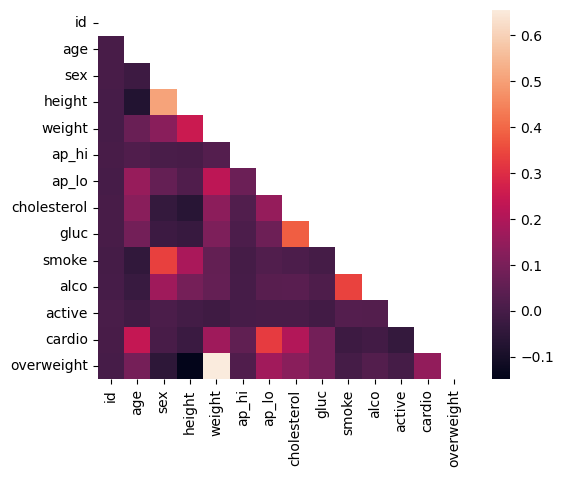

In [91]:
draw_heat_map()